In [11]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

# sklearn
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# others
# import multiprocessing as mp
from xgboost import XGBRegressor
from tqdm import tqdm

# config
import sys
sys.path.append('/home/yusukemh/github/yusukemh/StatisticalDownscaling/writeup')
from config import C_COMMON, C_SINGLE, C_GRID, FILENAME
from util import load_data, XGB, NeuralNetwork

# enable autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
columns = C_SINGLE
df_train, df_test = load_data(columns + C_COMMON, FILENAME)

# Model performance comparison

In [27]:
# XGBoost
x_model = XGB(
    params={
        'n_estimators': 120,
        'learning_rate': 0.070755,
        'max_depth': 2
    },
    columns=columns
)
df_pred = x_model.evaluate(df_train, df_test)
df_pred

,skn,mae_lr,rmse_lr,mae_xgb,rmse_xgb
0,54.0,3.558593,4.833861,3.724248,5.020365
1,79.0,4.208636,6.301111,4.751905,6.714039
2,338.0,2.123845,2.818706,2.119263,2.948576
3,250.0,1.443336,2.189325,1.437160,2.196315
4,267.0,1.505239,2.243758,1.434376,2.200451
5,296.1,0.888049,1.250883,0.723007,1.222167
6,311.0,0.864515,1.188327,0.671441,1.181025
7,396.0,0.960739,1.308114,0.781160,1.235662
8,400.0,0.976187,1.298378,0.864615,1.260604
9,406.0,1.254386,1.643493,1.175606,1.600808


In [ ]:
n_model = NeuralNetwork(
)

In [132]:
# # first, compare overall performances between linear model and non-linear model using 100% of training data
# params = dict(n_estimators=100, learning_rate=0.039964, max_depth=4) # acquired by hyperparameter tuning
# dfs = []
# for skn in tqdm(df['skn'].unique()):
#     # obtain all data only for the station
#     df_train_station = df_train[df_train['skn'] == skn]
#     df_test_station = df_test[df_test['skn'] == skn]
    
#     x_train, x_test = np.array(df_train_station[columns]), np.array(df_test_station[columns])
#     y_train, y_test = np.array(df_train_station['data_in']), np.array(df_test_station['data_in'])
    
#     xgboost = XGBRegressor(**params)
#     xgboost.fit(x_train, y_train)
#     yhat_xgb = xgboost.predict(x_test)
    
#     linear_regression = LinearRegression()
#     linear_regression.fit(x_train, y_train)
#     yhat_lr = linear_regression.predict(x_test)
    
#     dfs.append(
#         pd.DataFrame({
#             "skn": [skn],
#             "n_data": [x_train.shape[0]],
#             "rmse_lr": [mean_squared_error(y_test, yhat_lr, squared=False)],
#             "rmse_xgb": [mean_squared_error(y_test, yhat_xgb, squared=False)]
#         })
#     )
    
    

100%|██████████| 24/24 [00:04<00:00,  5.35it/s]


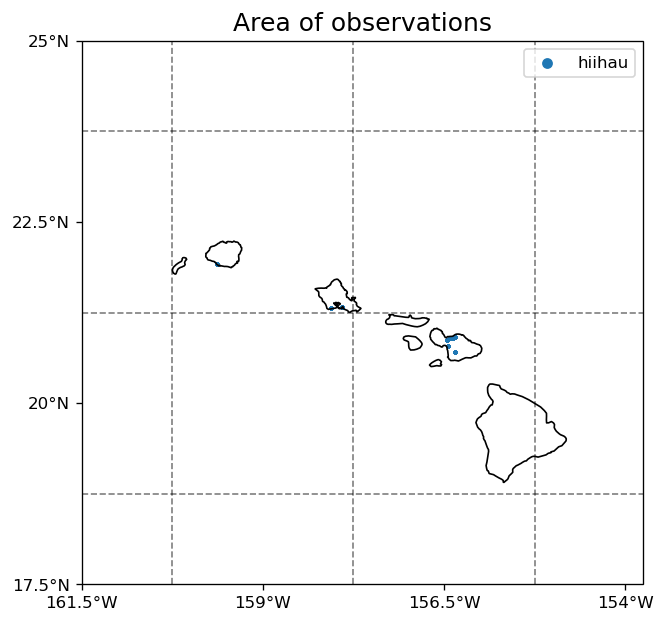

In [140]:
lats = df[df['skn'].isin(b)][['lat']]
lons = df[df['skn'].isin(b)][['lon']]

plt.figure(figsize=(10, 6), dpi=120)
ax = plt.axes(projection=ccrs.PlateCarree())

xmin, xmax = -161.5, -153.75
ymin, ymax = 17.5, 25

ax.set_xticks(np.arange(xmin, xmax+1, 2.5))
ax.set_yticks(np.arange(ymin, ymax+1, 2.5))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')


observations = ax.scatter(lons, lats, s=1, label='hiihau')


ax.vlines(x=np.arange(xmin, xmax+1, 2.5) - 1.25, ymin=ymin, ymax=ymax, color="k", linewidth=1, linestyle="--", alpha=0.5)
ax.hlines(y=np.arange(ymin, ymax+1, 2.5) - 1.25 , xmin=xmin, xmax=xmax, color="k", linewidth=1, linestyle="--", alpha=0.5)
plt.title("Area of observations", fontsize=(15))
legend = plt.legend()
# modify the dot size in the legend
for handle in legend.legendHandles:
    handle._sizes = [30]
ax.coastlines(resolution='10m')
print()

<AxesSubplot:>

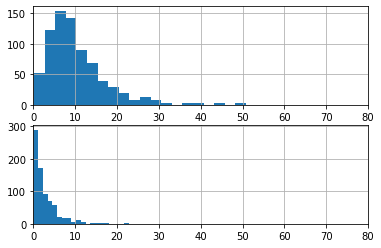

In [47]:
fig, axs = plt.subplots(2, subplot_kw=dict(xlim=(0, 80)))
bins = 20
df.query('skn == 87')['data_in'].hist(ax=axs[0], bins=bins)
df.query('skn == 267')['data_in'].hist(ax=axs[1], bins=bins)

In [27]:
(df_temp['n_data'] * df_temp['rmse_lr']).sum() / df_temp['n_data'].sum()

3.2223587362284603

In [11]:
params = dict(n_estimators=100, learning_rate=0.039964, max_depth=4)
test_sizes = np.arange(0.1, 1.1, 0.1)
dfs = []
for skn in tqdm(df['skn'].unique()):
    # print('=======================================================')
    df_train = df.query(f'(skn == {skn}) & fold != 4')
    df_test = df.query(f'(skn == {skn}) & fold == 4')
    # print(f"There are {df_train.shape[0]} training data")
    # print(f"There are {df_test.shape[0]} test data")
    for test_size in test_sizes:
        n_training_data = int(df_train.shape[0] * test_size) # floor

        df_train_partial = df_train.iloc[:n_training_data]
        # print(f"There are {df_train_partial.shape[0]} training data")
        # print(f"There are {df_test.shape[0]} test data")
    
        x_train, x_test = np.array(df_train_partial[columns]), np.array(df_test[columns])
        y_train, y_test = np.array(df_train_partial['data_in']), np.array(df_test['data_in'])
        xgboost = XGBRegressor(**params)
        xgboost.fit(x_train, y_train)
        yhat_xgb = xgboost.predict(x_test)
        rmse_xgb = mean_squared_error(y_test, yhat_xgb, squared=False)

        linear_regression = LinearRegression()
        linear_regression.fit(x_train, y_train)
        yhat_lr = linear_regression.predict(x_test)
        rmse_lr = mean_squared_error(y_test, yhat_lr, squared=False)

        # list_rmse_lr.append(rmse_lr)
        # list_rmse_xgb.append(rmse_xgb)
        dfs.append(
            pd.DataFrame({
                'skn': [skn],
                'n_data': [n_training_data],
                'rmse_lr': [rmse_lr],
                'rmse_xgb': [rmse_xgb]
            })
        )

        # print(f"RMSE on Linear Regression: {rmse_lr: .3f}")
        # print(f"RMSE on XGBoost          : {rmse_xgb: .3f}")

100%|██████████| 24/24 [01:30<00:00,  3.77s/it]


In [13]:
df_result = pd.concat(dfs)
df_result[df_result['skn'] == 54]

,skn,n_data,rmse_lr,rmse_xgb
0,54.0,62,14.234169,6.537301
0,54.0,124,14.444078,8.016679
0,54.0,186,9.036019,10.503394
0,54.0,248,6.946331,8.458755
0,54.0,311,7.252275,5.927536
0,54.0,373,6.219581,5.717959
0,54.0,435,5.912614,5.483237
0,54.0,497,5.619609,5.441584
0,54.0,559,5.374906,5.330334
0,54.0,622,5.367089,5.481448


In [87]:
weighted_mean_rmse_lr = df_result['rmse_lr'] * df_result['n_data']

,skn,n_data,rmse_lr,rmse_xgb
0,54.0,62,7.229912,6.488889
0,54.0,124,7.874042,8.527648
0,54.0,186,10.472182,9.087810
0,54.0,248,6.695368,8.747801
0,54.0,311,5.070547,5.553801
...,...,...,...,...
0,1020.1,358,2.791917,2.989434
0,1020.1,417,2.828048,3.089860
0,1020.1,477,2.824450,3.104744
0,1020.1,537,2.811842,3.134442


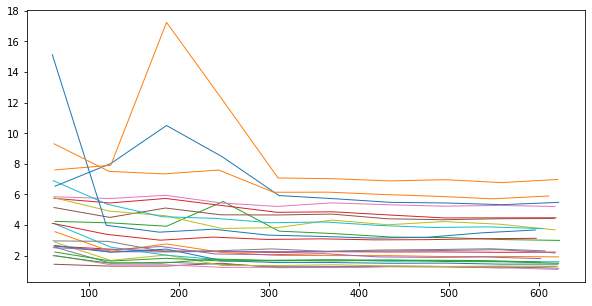

In [82]:
fig, ax = plt.subplots(1, figsize=(10,5))
for skn in df_result['skn'].unique():
    df_station = df_result.query(f'skn == {skn}')
    # ax.plot(df_station['n_data'], df_station['rmse_lr'], label='linear')
    ax.plot(df_station['n_data'], df_station['rmse_xgb'], label='xgb', linewidth=1)
    # ax.legend()

In [84]:
columns = C_SINGLE
df = pd.read_csv(FILENAME, usecols=C_COMMON + columns)
params = dict(n_estimators=100, learning_rate=0.039964, max_depth=4)
test_sizes = np.arange(0.1, 1.1, 0.1)
dfs = []
for skn in tqdm(df['skn'].unique()):
    # print('=======================================================')
    df_train = df.query(f'(skn == {skn}) & fold != 4')
    df_test = df.query(f'skn == {skn} & fold == 4')
    # print(f"There are {df_train.shape[0]} training data")
    # print(f"There are {df_test.shape[0]} test data")
    for test_size in test_sizes:
        n_training_data = int(df_train.shape[0] * test_size) # floor

        df_train_partial = df_train.iloc[:n_training_data]
        # print(f"There are {df_train_partial.shape[0]} training data")
        # print(f"There are {df_test.shape[0]} test data")
    
        x_train, x_test = np.array(df_train_partial[columns]), np.array(df_test[columns])
        y_train, y_test = np.array(df_train_partial['data_in']), np.array(df_test['data_in'])
        xgboost = XGBRegressor(**params)
        xgboost.fit(x_train, y_train)
        yhat_xgb = xgboost.predict(x_test)
        rmse_xgb = mean_squared_error(y_test, yhat_xgb, squared=False)

        linear_regression = LinearRegression()
        linear_regression.fit(x_train, y_train)
        yhat_lr = linear_regression.predict(x_test)
        rmse_lr = mean_squared_error(y_test, yhat_lr, squared=False)

        list_rmse_lr.append(rmse_lr)
        list_rmse_xgb.append(rmse_xgb)
        dfs.append(
            pd.DataFrame({
                'skn': [skn],
                'n_data': [n_training_data],
                'rmse_lr': [rmse_lr],
                'rmse_xgb': [rmse_xgb]
            })
        )

        # print(f"RMSE on Linear Regression: {rmse_lr: .3f}")
        # print(f"RMSE on XGBoost          : {rmse_xgb: .3f}")

100%|██████████| 24/24 [00:21<00:00,  1.12it/s]


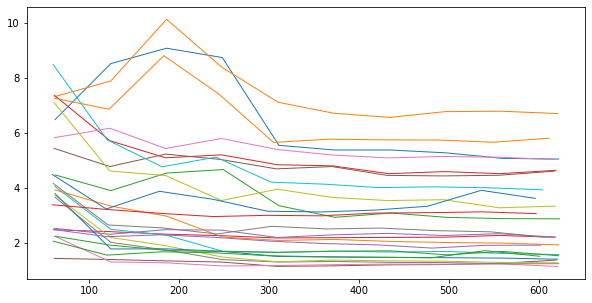

In [85]:
df_result_ = pd.concat(dfs)

fig, ax = plt.subplots(1, figsize=(10,5))
for skn in df_result_['skn'].unique():
    df_station = df_result_.query(f'skn == {skn}')
    # ax.plot(df_station['n_data'], df_station['rmse_lr'], label='linear')
    ax.plot(df_station['n_data'], df_station['rmse_xgb'], label='xgb', linewidth=1)
    # ax.legend()

In [257]:
def cross_val_predict(df: pd.DataFrame, model, skn: int, columns: list, verbose=False):
    """
    Runs cross_val_predict for a single skn, using XGB or LinearRegression.
    The same functionality as sklearn.model_selection.cross_val_predict,
    except the split is not exactly 1/5 (thus pre-determined by preprocessing).
    This is because the split has to be made in the way it won't separate samples in the same month into different folds.
        Args:
            :param df: dataset for evaluation. Must contain 'fold' column that specifies assignment of each sample to the folds.
            :param model: one of [sklearn.linear_models.LinearRegression, xgboost.XGBRegressor]
            :param skn: identifier for stations
            :param columns: list of str indicating which columns to use as input data for the model
    """
    assert 'fold' in df.columns, "Must contain a column 'fold' to specify assignment of samples to the folds."
    n_folds = len(df['fold'].unique())
    dfs = [] # list of dfs containing result for each fold
    
    iterator = tqdm(range(n_folds)) if verbose else range(n_folds)
    
    for fold in iterator:
        df_train = df.query(f'(fold != {fold}) & (skn == {skn})')
        df_test = df.query(f'(fold == {fold}) & (skn == {skn})')
        
        x_train, x_test = np.array(df_train[columns]), np.array(df_test[columns])
        y_train, y_test = np.array(df_train['data_in']), np.array(df_test['data_in'])
        
        model.fit(x_train, y_train)
        yhat = model.predict(x_test)
        
        _df = pd.DataFrame(
            {
                'skn' : df_test['skn'].values,
                'year': df_test['year'].values,
                'month': df_test['month'].values,
                'observed': df_test['data_in'].values,
                'prediction': yhat,
            }
        )
        dfs.append(_df)
        
    return pd.concat(dfs)

def parallelize(func, args, n_jobs=-1):
    """
    :param args: iterable. list of arguments for the function
    """
    if n_jobs == -1:
        pool = mp.Pool(mp.cpu_count())
    else:
        pool = mp.Pool(n_jobs)
    result_objects = [pool.apply_async(func, args=_args) for _args in args]
    pool.close()
    pool.join()
    return [r.get() for r in result_objects]

In [265]:
linear_regression = LinearRegression()
params = {'n_estimators': 260, 'learning_rate': 0.1, 'max_depth': 3, 'early_stopping_rounds': 8, 'verbosity': 0}
xgboost = XGBRegressor(**params)

for skn in df['skn'].unique():
    print(f"experiment on {skn}")
    df_result = cross_val_predict(df, linear_regression, skn=skn, columns=columns, verbose=False)
    rmse = mean_squared_error(df_result['observed'], df_result['prediction'], squared=False)
    print(f'RMSE using LR: {rmse:.2f}')
    df_result = cross_val_predict(df, xgboost, skn=skn, columns=columns, verbose=False)
    rmse = mean_squared_error(df_result['observed'], df_result['prediction'], squared=False)
    print(f'RMSE using XGB: {rmse:3.2f}')
    print('=================================================================================')
    

experiment on 54.0
RMSE using LR: 5.18
RMSE using XGB: 5.60
experiment on 79.0
RMSE using LR: 6.00
RMSE using XGB: 6.76
experiment on 338.0
RMSE using LR: 4.21
RMSE using XGB: 4.62
experiment on 250.0
RMSE using LR: 2.05
RMSE using XGB: 2.22
experiment on 267.0
RMSE using LR: 2.22
RMSE using XGB: 2.33
experiment on 296.1
RMSE using LR: 1.51
RMSE using XGB: 1.62
experiment on 311.0
RMSE using LR: 1.36
RMSE using XGB: 1.43
experiment on 396.0
RMSE using LR: 1.55
RMSE using XGB: 1.56
experiment on 400.0
RMSE using LR: 1.62
RMSE using XGB: 1.67
experiment on 406.0
RMSE using LR: 1.78
RMSE using XGB: 1.83
experiment on 410.0
RMSE using LR: 1.71
RMSE using XGB: 1.80
experiment on 485.0
RMSE using LR: 2.20
RMSE using XGB: 2.27
experiment on 703.0
RMSE using LR: 1.95
RMSE using XGB: 2.02
experiment on 718.0
RMSE using LR: 5.10
RMSE using XGB: 5.43
experiment on 770.0
RMSE using LR: 2.19
RMSE using XGB: 2.39
experiment on 783.0
RMSE using LR: 4.40
RMSE using XGB: 4.78
experiment on 784.0
RMSE u